In [11]:
import pandas as pd
import ast
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler

In [12]:
df_1 = pd.read_csv('data/page_1_to_50.csv')
df_2 = pd.read_csv('data/page_51_to_100.csv')
merged_df = pd.concat([df_1, df_2], ignore_index=True)
df = merged_df.copy()
df.head()

,Film_title,Release_year,Director,Cast,Average_rating,Owner_rating,Genres,Runtime,Countries,Original_language,...,★★,★★½,★★★,★★★½,★★★★,★★★★½,★★★★★,Total_ratings,Film_URL,List_URL
0,Nosferatu,2024,Robert Eggers,"['Lily-Rose Depp', 'Nicholas Hoult', 'Bill Ska...",3.85,NaN,"['Drama', 'Fantasy', 'Horror']",133.0,['USA'],English,...,25493,33560,103241,154221,312256,162607,152158,959944,https://letterboxd.com/film/nosferatu-2024/,https://letterboxd.com/films/ajax/popular/this...
1,Wicked,2024,Jon M. Chu,"['Cynthia Erivo', 'Ariana Grande', 'Jeff Goldb...",3.95,NaN,"['Romance', 'Drama', 'Fantasy']",162.0,['USA'],English,...,23214,32167,109190,146838,323004,179664,378065,1208483,https://letterboxd.com/film/wicked-2024/,https://letterboxd.com/films/ajax/popular/this...
2,Wallace & Gromit: Vengeance Most Fowl,2024,"Merlin Crossingham, Nick Park","['Ben Whitehead', 'Peter Kay', 'Lauren Patel',...",3.95,NaN,"['Adventure', 'Family', 'Comedy', 'Animation']",79.0,['UK'],English,...,1589,3030,18284,35623,83571,28683,39470,210912,https://letterboxd.com/film/wallace-gromit-ven...,https://letterboxd.com/films/ajax/popular/this...
3,The Substance,2024,Coralie Fargeat,"['Demi Moore', 'Margaret Qualley', 'Dennis Qua...",3.84,NaN,"['Horror', 'Science Fiction']",141.0,"['France', 'UK', 'USA']",English,...,50295,56049,171308,221586,488374,253480,314285,1599100,https://letterboxd.com/film/the-substance/,https://letterboxd.com/films/ajax/popular/this...
4,Anora,2024,Sean Baker,"['Mikey Madison', 'Mark Eydelshteyn', 'Yura Bo...",4.06,NaN,"['Drama', 'Romance', 'Comedy']",139.0,['USA'],English,...,13140,16652,54108,84690,215069,152572,138212,684677,https://letterboxd.com/film/anora/,https://letterboxd.com/films/ajax/popular/this...


In [13]:
unique_genres = set()
for genres in df['Genres']:
    if pd.notna(genres):
        genres_list = ast.literal_eval(genres)
        unique_genres.update(genres_list)

for genre in unique_genres:
    print(genre)

Show All…
Crime
TV Movie
Epic heroes
Fantasy adventure, heroism, and swordplay
Science Fiction
Twisted dark psychological thriller
Drama
Animation
Adventure
Superheroes in action-packed battles with villains
Western
Mystery
Survival horror and zombie carnage
Thought-provoking sci-fi action and future technology
Horror
Documentary
Sci-fi horror, creatures, and aliens
Comedy
Thriller
Family
History
Intense combat and martial arts
Action
Action-packed space and alien sagas
War
Horror, the undead and monster classics
Music
Gory, gruesome, and slasher horror
Fantasy
Bloody vampire horror
Romance


In [14]:
unique_ratings = set()
for rating in merged_df['Average_rating']:
    if pd.notna(rating):
        unique_ratings.add(rating)

for rating in unique_ratings:
    print(rating)

1.5
2.5
3.95
3.84
4.06
3.2
3.01
3.8
3.88
4.39
2.0
3.5
2.75
2.25
1.75
3.25
3.75
3.0
4.25
4.0
4.5
1.43
2.36
2.11
3.36
3.11
3.86
4.22
4.47
4.19
4.44
4.69
2.66
2.41
2.91
2.16
3.91
3.16
3.41
3.66
4.66
4.16
4.41
1.52
1.77
1.27
2.52
2.27
2.77
2.02
3.77
3.52
3.02
3.27
1.38
1.63
1.88
2.88
2.63
2.13
2.38
3.38
3.63
3.13
4.13
4.38
4.63
4.35
4.1
4.6
1.97
1.47
1.76
1.55
1.3
1.26
1.59
1.89
1.93
1.09
4.07
4.32
4.57
2.43
2.18
3.18
3.68
3.93
1.86
1.29
1.79
2.04
2.79
2.54
2.29
3.79
3.54
3.29
3.04
4.29
4.54
4.04
1.72
1.15
2.65
2.15
2.4
3.4
3.65
3.9
3.15
2.51
2.76
2.26
2.01
3.76
3.26
3.51
4.26
4.01
4.51
4.23
4.48
2.95
2.45
2.7
2.2
3.7
3.45
4.7
4.45
4.2
1.81
2.31
2.56
2.81
2.06
3.56
3.81
3.31
3.06
1.92
1.17
1.67
2.42
2.92
2.67
2.17
3.17
3.92
3.67
3.42
4.42
4.17
4.67
2.03
2.28
2.78
2.53
3.53
3.28
3.78
3.03
4.14
1.9
2.9
3.85
3.69
3.43
2.32
2.07
2.86
2.61
2.68
2.93
3.61
4.11
4.36
4.61
2.72
2.97
2.22
2.47
3.72
3.47
3.22
3.97
1.83
1.08
1.33
1.58
2.83
2.58
2.08
2.33
3.33
3.83
3.08
3.58
4.33
4.08
4.58
1.94
1.19
1.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6984 entries, 0 to 6983
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film_title         6984 non-null   object 
 1   Release_year       6984 non-null   int64  
 2   Director           6967 non-null   object 
 3   Cast               6934 non-null   object 
 4   Average_rating     6957 non-null   float64
 5   Owner_rating       0 non-null      float64
 6   Genres             6973 non-null   object 
 7   Runtime            6956 non-null   float64
 8   Countries          6923 non-null   object 
 9   Original_language  6984 non-null   object 
 10  Spoken_languages   6984 non-null   object 
 11  Description        6977 non-null   object 
 12  Studios            6882 non-null   object 
 13  Watches            6984 non-null   int64  
 14  List_appearances   6984 non-null   int64  
 15  Likes              6984 non-null   int64  
 16  Fans               6984 

In [16]:
# Standardize numerical columns
numerical_columns = ['Average_rating', 'Runtime', 'Fans', 'Watches', 'List_appearances', 'Likes', 'Total_ratings']

# Fill NaN values with mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
new_df = df[numerical_columns]

new_df.head()

,Average_rating,Runtime,Fans,Watches,List_appearances,Likes,Total_ratings
0,0.765884,0.292036,0.863223,1.554632,2.605212,1.944568,2.424160
1,0.933734,0.719894,1.867381,2.123943,2.376814,2.819354,3.190443
2,0.933734,-0.504667,-0.190741,-0.068831,-0.025368,0.129536,0.114779
3,0.749099,0.410065,1.666550,3.010556,4.171639,3.378046,4.394776
4,1.118369,0.380558,0.863223,0.998290,2.324657,1.394603,1.575469


In [17]:
# Standardize categorical columns
categorical_columns = ['Genres', 'Countries']

# Fill NaN values with '[]'
df[categorical_columns] = df[categorical_columns].fillna('[]')

for column in categorical_columns:
    df[column] = df[column].apply(ast.literal_eval)

    mlb = MultiLabelBinarizer()

    df_encoded = mlb.fit_transform(df[column])
    df_encoded_df = pd.DataFrame(df_encoded, columns=[f"{column}_{label}" for label in mlb.classes_])

    new_df = pd.concat([new_df, df_encoded_df], axis=1)

new_df.head()

,Average_rating,Runtime,Fans,Watches,List_appearances,Likes,Total_ratings,Genres_Action,Genres_Action-packed space and alien sagas,Genres_Adventure,...,Countries_Turkey,Countries_UK,Countries_USA,Countries_USSR,Countries_Uganda,Countries_Ukraine,Countries_United Arab Emirates,Countries_Vietnam,Countries_Yugoslavia,Countries_Zambia
0,0.765884,0.292036,0.863223,1.554632,2.605212,1.944568,2.424160,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.933734,0.719894,1.867381,2.123943,2.376814,2.819354,3.190443,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.933734,-0.504667,-0.190741,-0.068831,-0.025368,0.129536,0.114779,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0.749099,0.410065,1.666550,3.010556,4.171639,3.378046,4.394776,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,1.118369,0.380558,0.863223,0.998290,2.324657,1.394603,1.575469,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [18]:
new_df.columns

Index(['Average_rating', 'Runtime', 'Fans', 'Watches', 'List_appearances',
       'Likes', 'Total_ratings', 'Genres_Action',
       'Genres_Action-packed space and alien sagas', 'Genres_Adventure',
       ...
       'Countries_Turkey', 'Countries_UK', 'Countries_USA', 'Countries_USSR',
       'Countries_Uganda', 'Countries_Ukraine',
       'Countries_United Arab Emirates', 'Countries_Vietnam',
       'Countries_Yugoslavia', 'Countries_Zambia'],
      dtype='object', length=130)

In [19]:
# Fit UMAP and transform the data
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
umap_embedding = umap_model.fit_transform(new_df)

umap_df = pd.DataFrame(umap_embedding, columns=['x', 'y'])
umap_df = pd.concat([umap_df, merged_df], axis=1)
umap_df.to_csv('data/umap_data.csv', index=False)

# Add UMAP results back to DataFrame
df['umap_1'] = umap_embedding[:, 0]
df['umap_2'] = umap_embedding[:, 1]

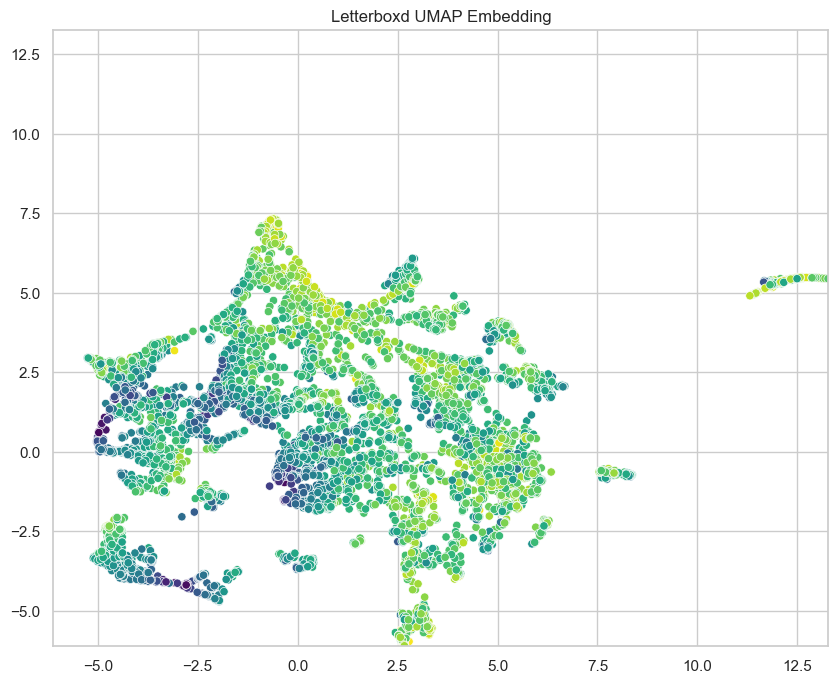

In [20]:
sns.set_theme(style='whitegrid')

plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x=df['umap_1'], y=df['umap_2'], hue=df['Average_rating'], palette='viridis', sizes=(50, 200), legend=None)

plt.xlim(min(df['umap_1'].min(), df['umap_2'].min()), max(df['umap_1'].max(), df['umap_2'].max()))
plt.ylim(min(df['umap_1'].min(), df['umap_2'].min()), max(df['umap_1'].max(), df['umap_2'].max()))

plt.title('Letterboxd UMAP Embedding')
plt.xlabel('')
plt.ylabel('')
plt.savefig('data/umap.png')
plt.show()